# YouTube Trending Videos Analysis

Youtube videos has been the part of our life. We watch lots of videos for entartainment, information, education and many more.We all have someday been curious to know what are the common things in the videos which has unbeleivable amount of views. I am excited to share this analysis to you where I will try to analyse the commonplace in them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

## 1. Importing the data

In [2]:
df = pd.read_csv("E:/Projects/Personal Projects/Comman things in youtube trending videos/INvideos.csv")
df.head()

video_id trending_date  \
0  kzwfHumJyYc      17.14.11   
1  zUZ1z7FwLc8      17.14.11   
2  10L1hZ9qa58      17.14.11   
3  N1vE8iiEg64      17.14.11   
4  kJzGH0PVQHQ      17.14.11   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   

   category_id              publish_time  \
0            1  2017-11-12T12:20:39.000Z   
1           25  2017-11-13T05:43:56.000Z   
2           24  2017-11-12T15:48:08.000Z   
3           23  2017-11-12T07:08:48.000Z   
4           24  2017-11-13T01:14:16.000Z   

                                                tags    views  likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1  पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3  Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4  Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   

   dislikes  comment_count                                  thumbnail_link  \
0       798            882  https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg   
1       904              0  https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg   
2       243            149  https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg   
3      1624           2684  https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg   
4       293             66  https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1               True             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Presenting Sharry Mann latest Punjabi Song  Cu...  
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...  
2  Watch Stylish Star Allu Arjun @ ChaySam Weddin...  
3  This video showcases the difference between pe...  
4  why Samantha became EMOTIONAL @ Samantha naga ...

### Read the csv file  and
### Set the few configuration options to improve visualization plots

In [3]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## 2. Exploratory Data Analysis

In [4]:
df.shape # 37352 videos with 16 features

(37352, 16)

In [5]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [6]:
df.isna().sum() #561  videos with no discription

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

#### *Observation:* 98.49%  of videos has descriptions

## 3. Preprocesssing
#### Handling null values

In [7]:
df.description = df.description.fillna(value = "")

In [8]:
df.isnull().sum() # Now there are no null

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [9]:
df.count()

video_id                  37352
trending_date             37352
title                     37352
channel_title             37352
category_id               37352
publish_time              37352
tags                      37352
views                     37352
likes                     37352
dislikes                  37352
comment_count             37352
thumbnail_link            37352
comments_disabled         37352
ratings_disabled          37352
video_error_or_removed    37352
description               37352
dtype: int64

#### Removing duplicates

In [10]:
df.duplicated().sum()  # 4263 Duplicates

4263

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.count()

video_id                  33089
trending_date             33089
title                     33089
channel_title             33089
category_id               33089
publish_time              33089
tags                      33089
views                     33089
likes                     33089
dislikes                  33089
comment_count             33089
thumbnail_link            33089
comments_disabled         33089
ratings_disabled          33089
video_error_or_removed    33089
description               33089
dtype: int64

In [13]:
df.describe()

category_id        views      likes   dislikes  comment_count
count     33089.00     33089.00   33089.00   33089.00       33089.00
mean         21.63    996342.51   25587.62    1576.54        2524.78
std           6.49   3148110.59   96473.20   16895.73       14769.83
min           1.00      4024.00       0.00       0.00           0.00
25%          23.00    112719.00     787.00      98.00          72.00
50%          24.00    275027.00    2757.00     289.00         298.00
75%          24.00    732022.00   12011.00     932.00        1169.00
max          43.00 125432237.00 2912710.00 1545017.00      827755.00

### *Observation:*  
#### 1. Total trending videos are 33089
#### 2. The average number of views is 9.9 million approx. and the median values is 275027. It is negetively skewed
#### 3. The average number of likes is 25587
#### 4. The average number of comments is 2524
#### 5. The maximum number of views is 125432237
#### 6. The maximum number of dislikes  is 1545017 and average is 1576


In [14]:
df[df["views"] == max(df["views"])] #Video with maximum views

video_id trending_date  \
5408  FlsCjmMhFmw      17.12.12   

                                                  title      channel_title  \
5408  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   

      category_id              publish_time  \
5408           24  2017-12-06T17:58:51.000Z   

                                                   tags      views    likes  \
5408  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  125432237  2912710   

      dislikes  comment_count                                  thumbnail_link  \
5408   1545017         807558  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
5408              False             False                   False   

                                            description  
5408  YouTube Rewind 2017. Celebrating the videos, p...

In [15]:
df[df["likes"] == max(df["likes"])] # Video with maximum number of likes

video_id trending_date  \
5408  FlsCjmMhFmw      17.12.12   

                                                  title      channel_title  \
5408  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   

      category_id              publish_time  \
5408           24  2017-12-06T17:58:51.000Z   

                                                   tags      views    likes  \
5408  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  125432237  2912710   

      dislikes  comment_count                                  thumbnail_link  \
5408   1545017         807558  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
5408              False             False                   False   

                                            description  
5408  YouTube Rewind 2017. Celebrating the videos, p...

In [16]:
df[df["dislikes"] == max(df["dislikes"])]  # The most disliked video

video_id trending_date  \
5408  FlsCjmMhFmw      17.12.12   

                                                  title      channel_title  \
5408  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   

      category_id              publish_time  \
5408           24  2017-12-06T17:58:51.000Z   

                                                   tags      views    likes  \
5408  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  125432237  2912710   

      dislikes  comment_count                                  thumbnail_link  \
5408   1545017         807558  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
5408              False             False                   False   

                                            description  
5408  YouTube Rewind 2017. Celebrating the videos, p...

### The most liked and the most disliked video is the same video

In [17]:
df[df["views"]>= 100000000] # 3 videos above 100M views

video_id trending_date  \
4936  FlsCjmMhFmw      17.10.12   
5119  FlsCjmMhFmw      17.11.12   
5408  FlsCjmMhFmw      17.12.12   

                                                  title      channel_title  \
4936  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
5119  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
5408  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   

      category_id              publish_time  \
4936           24  2017-12-06T17:58:51.000Z   
5119           24  2017-12-06T17:58:51.000Z   
5408           24  2017-12-06T17:58:51.000Z   

                                                   tags      views    likes  \
4936  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  100911567  2656672   
5119  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  113876217  2811216   
5408  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  125432237  2912710   

      dislikes  comment_count                                  thumbnail_link  \
4936   1353650         682890  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   
5119   1470387         787174  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   
5408   1545017         807558  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
4936              False             False                   False   
5119              False             False                   False   
5408              False             False                   False   

                                            description  
4936  YouTube Rewind 2017. Celebrating the videos, p...  
5119  YouTube Rewind 2017. Celebrating the videos, p...  
5408  YouTube Rewind 2017. Celebrating the videos, p...

## 4. Data Visualization

In [18]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [19]:
df_date = df['trending_date'].str[:2].value_counts().reset_index()\
            .rename(columns={'count': 'video_count', 'trending_date':'year'})
df_date['year'] = '20' + df_date['year']
df_date['video_count_percent'] = df_date['video_count']/(sum(df_date['video_count']))
df_date

year  video_count  video_count_percent
0  2018        24077                 0.73
1  2017         9012                 0.27

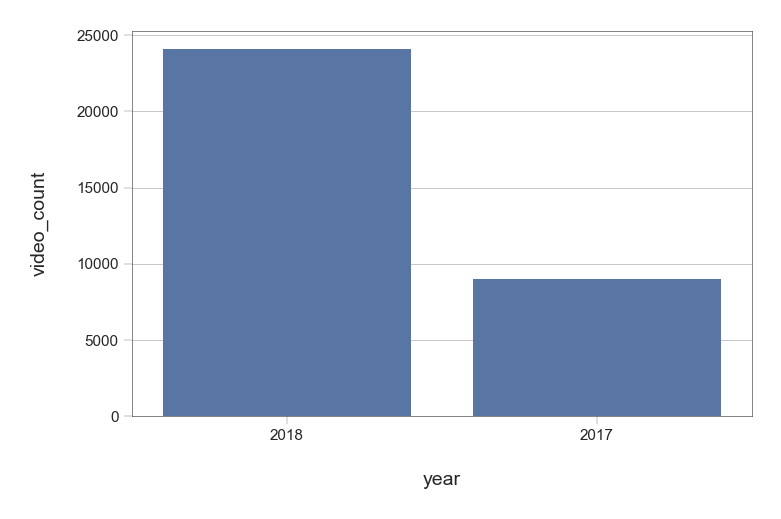

In [20]:
fig, ax = plt.subplots()
bar = sns.barplot(x='year', y='video_count', data=df_date, ax=ax)

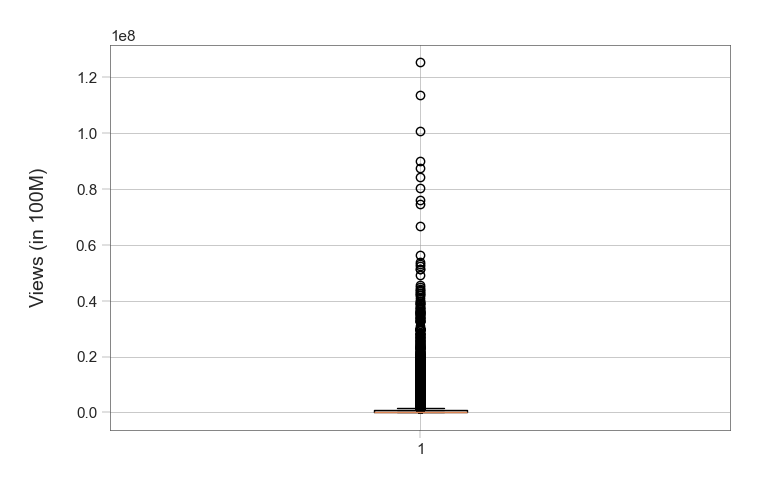

In [21]:
plt.boxplot(df["views"])
plt.ylabel("Views (in 100M)")
plt.show()

#### *Observations:* The most of videos has likes belo 60 M. Only three videos are above 100M views

In [22]:
import pandas as pd
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

def is_full_english_title(title):
    try:
        # Detect the language of the title
        language = detect(title)
        return language == 'en'
    except LangDetectException:
        # Handle cases where detection fails
        return False

In [23]:
for title in list(df["title"][:5]):
    if is_full_english_title(title):
        print(True)
    else:
        print(False)

True
False
True
False
True


In [24]:
df["English_title_or_not"] = df["title"].apply(is_full_english_title)

In [25]:

for title in list(df["title"][:5]):
    if is_full_english_title(title):
        print(f"The title '{title}' is in full English.")
    else:
        print(f"The title '{title}' is not in full English.")

The title 'Sharry Mann: Cute Munda ( Song Teaser) | Parmish Verma | Releasing on 17 November' is in full English.
The title 'पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दंग रह जायेंगे' is not in full English.
The title 'Stylish Star Allu Arjun @ ChaySam Wedding Reception | TFPC' is in full English.
The title 'Eruma Saani | Tamil vs English' is not in full English.
The title 'why Samantha became EMOTIONAL @ Samantha naga chaithanya marriage Reception | Filmylooks' is in full English.


In [26]:
E_or_not = df["English_title_or_not"].value_counts().to_dict()
E_or_not

{False: 16605, True: 16484}

In [27]:
def modify_key(key):
    if key :
        return "English_title"
    else:
        return "Non_english_title"

In [28]:
E_or_not_modified = {modify_key(key):value for key,value in E_or_not.items()}
E_or_not_modified

{'Non_english_title': 16605, 'English_title': 16484}

Text(0, 0.5, 'Count')

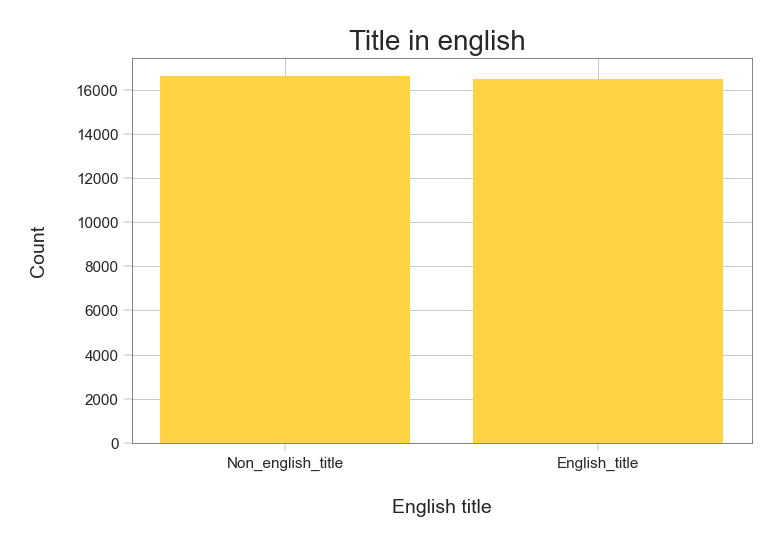

In [29]:
plt.bar(list(E_or_not_modified.keys()), list(E_or_not_modified.values()), color = "#ffd343")
plt.title('Title in english ', size = 20)
plt.xlabel('English title')
plt.ylabel('Count')

### *Observation:* The bar graph above shows that the number of english and non_english title are almost equal. That means the trending videos is inefficient of title language or we can say english or hindi , both title are equally appreciable

In [30]:
def is_capital(title):
    if title == title.upper():
        return True
    else:
        return False

df["Capital_title"] = df["title"].apply(is_capital)

In [31]:
df["Capital_title"].value_counts()

Capital_title
False    30114
True      2975
Name: count, dtype: int64

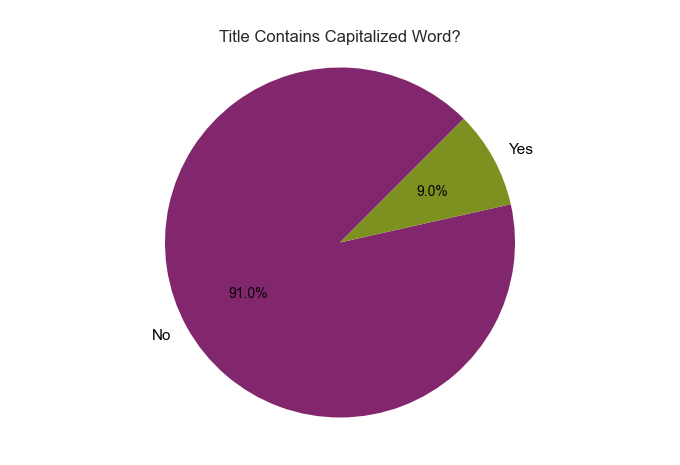

In [32]:
value_counts = df["Capital_title"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#82276e', '#7d9121'], textprops={'color': '#040204'}, startangle=45, autopct='%1.1f%%')
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

### *Observation:* There only 9 % titles in capital out of all titles

In [33]:
df["Capital_title_out_of_english"] = df[df["English_title_or_not"] == True]["title"].apply(is_capital)

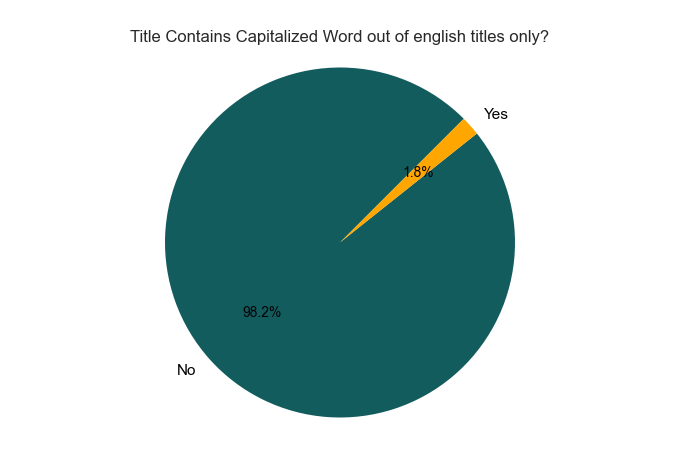

In [34]:
value_counts = df["Capital_title_out_of_english"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#135c5e', '#ffa600'], textprops={'color': '#040204'}, startangle=45, autopct='%1.1f%%')
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word out of english titles only?')

### *Observation:* Out of english there are only 1.9% titles in english. From this we can calclude , the non-capital titles should be selected to make the trending videos

C:\Users\Dell\AppData\Local\Temp\ipykernel_1472\2340479849.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


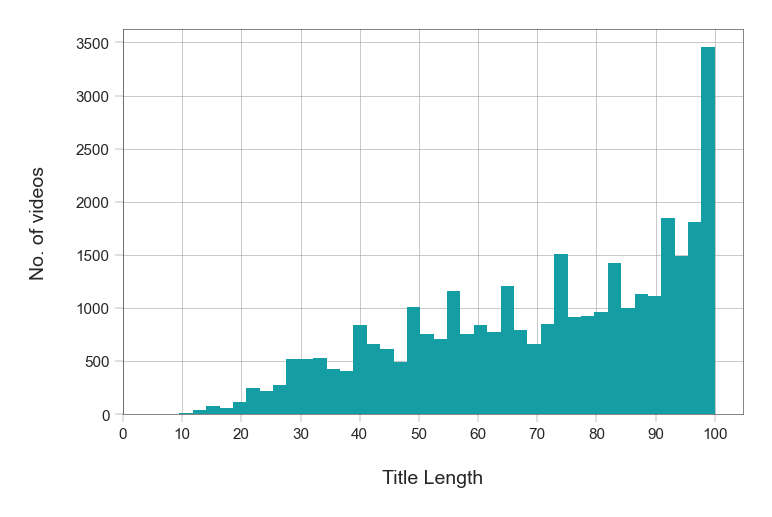

In [35]:
df["title_length"] = df["title"].apply(lambda x: len(x))
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color='#149ea3', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))


### *Observation:*  This shows that the videos with longer title length are more then the videos of shorter title length. Most of the vidoes are with 100 chararcters

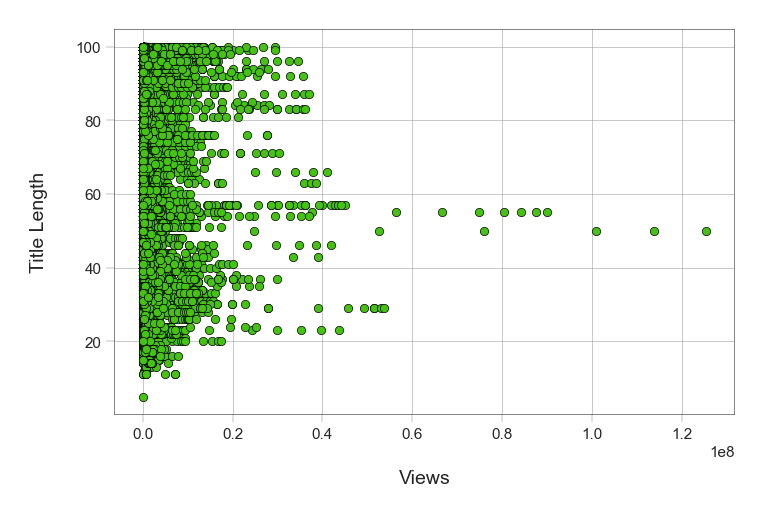

In [36]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color='#46c215', edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

### *Observation:*  By observing the scatterplot we can say there is no relationship between the length of the title and the number of views. However, we noticed an interesting thing that the Videos having 100,000,000 and more views have a title length of 50 characters or so.

### Correlation

In [37]:
df.select_dtypes(include=['number', 'bool']).columns

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'English_title_or_not', 'Capital_title', 'title_length'],
      dtype='object')

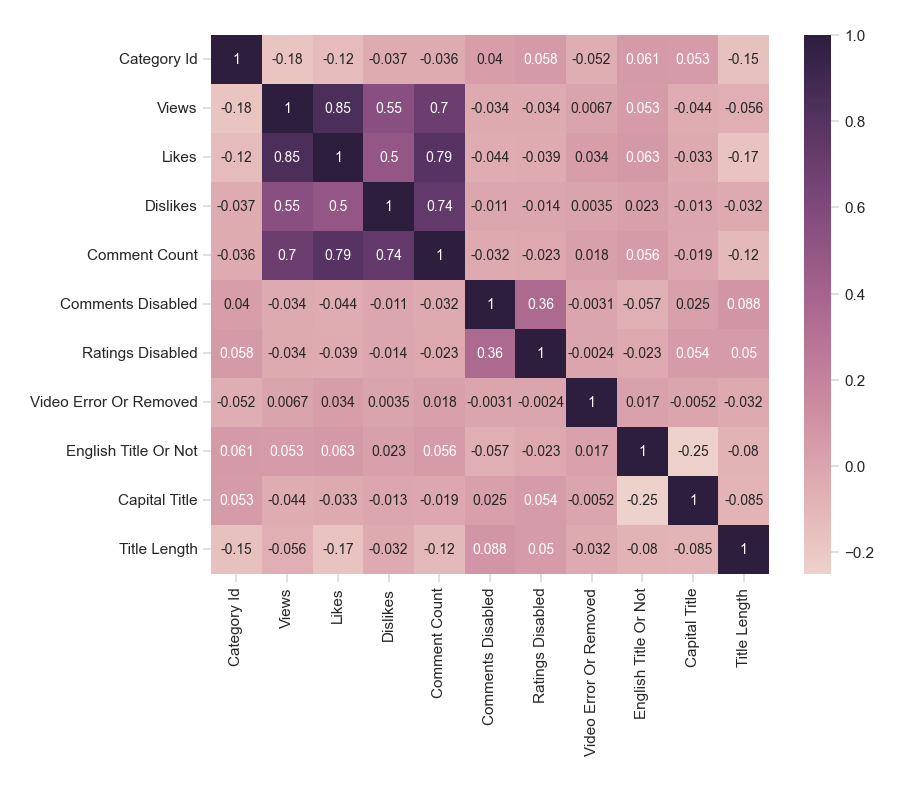

In [38]:
# Select numeric columns for correlation
numeric_columns = df.select_dtypes(include=['number', 'bool']).columns

# Modify labels for heatmap
h_labels = [x.replace('_', ' ').title() for x in numeric_columns]

# Plot the heatmap
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(df[numeric_columns].corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

# Display the plot
plt.show()

### *Observation:* It show the strong correlation between views and likes.

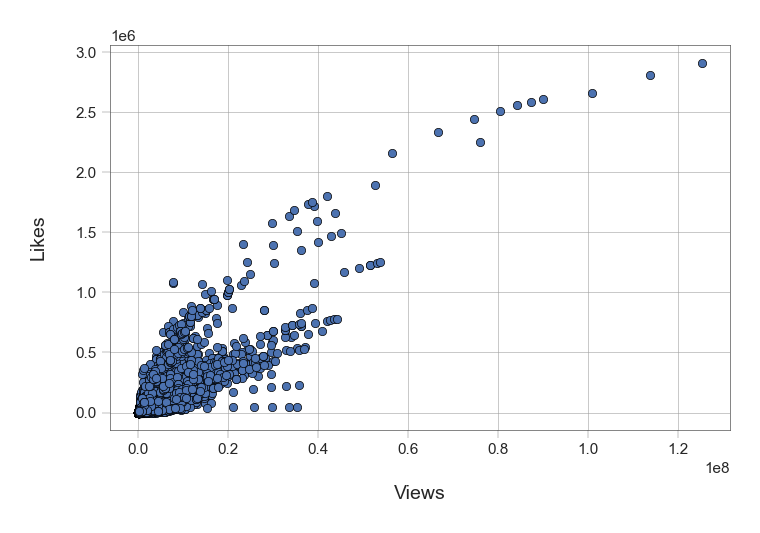

In [40]:
fig, ax = plt.subplots()
scat2 = plt.scatter(x=df['views'], y=df['likes'], edgecolors="#000000", linewidths=0.5)
scat2 = ax.set(xlabel="Views", ylabel="Likes")

### *Observation:* This shows that higher the views higher the likes.

In [41]:
print(list(df["title"].apply(lambda x: x.split())))

[['Sharry', 'Mann:', 'Cute', 'Munda', '(', 'Song', 'Teaser)', '|', 'Parmish', 'Verma', '|', 'Releasing', 'on', '17', 'November'], ['पीरियड्स', 'के', 'समय,', 'पेट', 'पर', 'पति', 'करता', 'ऐसा,', 'देखकर', 'दंग', 'रह', 'जायेंगे'], ['Stylish', 'Star', 'Allu', 'Arjun', '@', 'ChaySam', 'Wedding', 'Reception', '|', 'TFPC'], ['Eruma', 'Saani', '|', 'Tamil', 'vs', 'English'], ['why', 'Samantha', 'became', 'EMOTIONAL', '@', 'Samantha', 'naga', 'chaithanya', 'marriage', 'Reception', '|', 'Filmylooks'], ['MCA', '(Middle', 'Class', 'Abbayi)', 'TEASER', '-', 'Nani,Sai', 'Pallavi,', 'Dil', 'Raju,', 'Devi', 'Sri', 'Prasad,', 'Sriram', 'Venu'], ['Daang', '(', 'Full', 'Video', ')', '|', 'Mankirt', 'Aulakh', '|', 'Sukh', 'Sanghera', '|', 'Latest', 'Punjabi', 'Song', '2017', '|', 'Speed', 'Records'], ['Padmavati', ':', 'Ek', 'Dil', 'Ek', 'Jaan', 'Video', 'Song', '|', 'Deepika', 'Padukone', '|', 'Shahid', 'Kapoor', '|', 'Sanjay', 'Leela', 'Bhansali'], ['Chiranjeevi', 'in', 'Naga', 'Chaitanya', '-', 'Samanth

In [42]:
title_words = list(df["title"].apply(lambda x: x.split()))

In [43]:
# [ y for y in title_words]
# [x for x in y]

In [44]:
[x for y in title_words for x in y]

['Sharry',
 'Mann:',
 'Cute',
 'Munda',
 '(',
 'Song',
 'Teaser)',
 '|',
 'Parmish',
 'Verma',
 '|',
 'Releasing',
 'on',
 '17',
 'November',
 'पीरियड्स',
 'के',
 'समय,',
 'पेट',
 'पर',
 'पति',
 'करता',
 'ऐसा,',
 'देखकर',
 'दंग',
 'रह',
 'जायेंगे',
 'Stylish',
 'Star',
 'Allu',
 'Arjun',
 '@',
 'ChaySam',
 'Wedding',
 'Reception',
 '|',
 'TFPC',
 'Eruma',
 'Saani',
 '|',
 'Tamil',
 'vs',
 'English',
 'why',
 'Samantha',
 'became',
 'EMOTIONAL',
 '@',
 'Samantha',
 'naga',
 'chaithanya',
 'marriage',
 'Reception',
 '|',
 'Filmylooks',
 'MCA',
 '(Middle',
 'Class',
 'Abbayi)',
 'TEASER',
 '-',
 'Nani,Sai',
 'Pallavi,',
 'Dil',
 'Raju,',
 'Devi',
 'Sri',
 'Prasad,',
 'Sriram',
 'Venu',
 'Daang',
 '(',
 'Full',
 'Video',
 ')',
 '|',
 'Mankirt',
 'Aulakh',
 '|',
 'Sukh',
 'Sanghera',
 '|',
 'Latest',
 'Punjabi',
 'Song',
 '2017',
 '|',
 'Speed',
 'Records',
 'Padmavati',
 ':',
 'Ek',
 'Dil',
 'Ek',
 'Jaan',
 'Video',
 'Song',
 '|',
 'Deepika',
 'Padukone',
 '|',
 'Shahid',
 'Kapoor',
 '|',


In [45]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 36656),
 ('-', 13863),
 ('2018', 5848),
 ('Episode', 3602),
 ('||', 3383),
 ('The', 1702),
 ('2017', 1677),
 ('Movie', 1656),
 ('Full', 1648),
 ('Song', 1569),
 ('News', 1494),
 ('&', 1478),
 ('Telugu', 1411),
 ('Video', 1353),
 ('Latest', 1252),
 ('to', 1158),
 ('Official', 1149),
 (':', 1139),
 ('in', 1115),
 ('Trailer', 1077),
 ('New', 1035),
 ('2', 1009),
 ('Songs', 985),
 ('Punjabi', 932),
 ('TV', 928)]

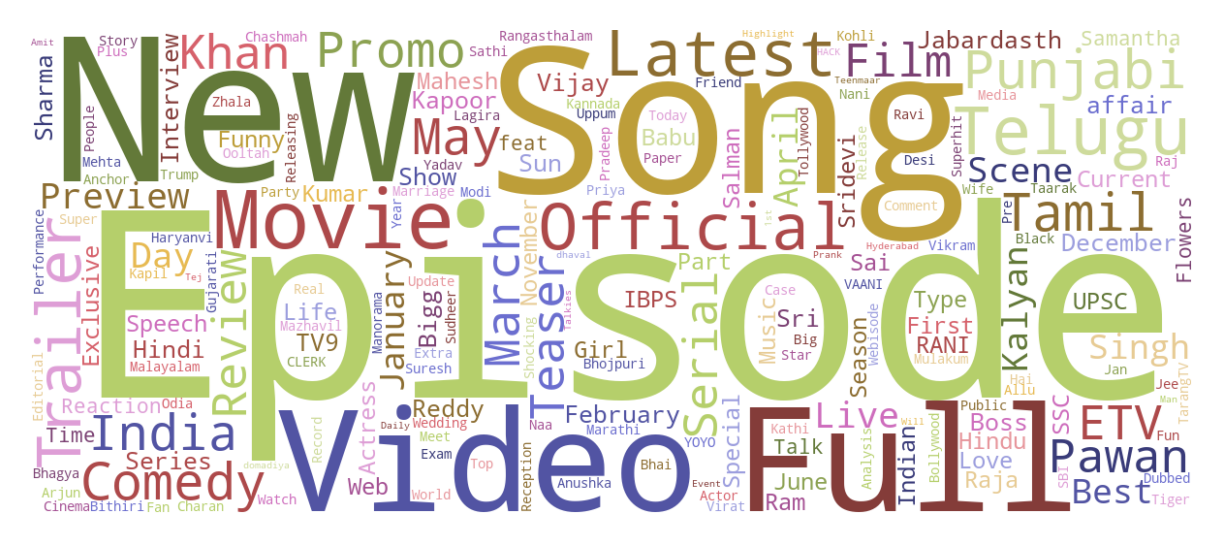

In [46]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False,include_numbers=False,min_word_length=3, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
cloud = plt.axis("off")

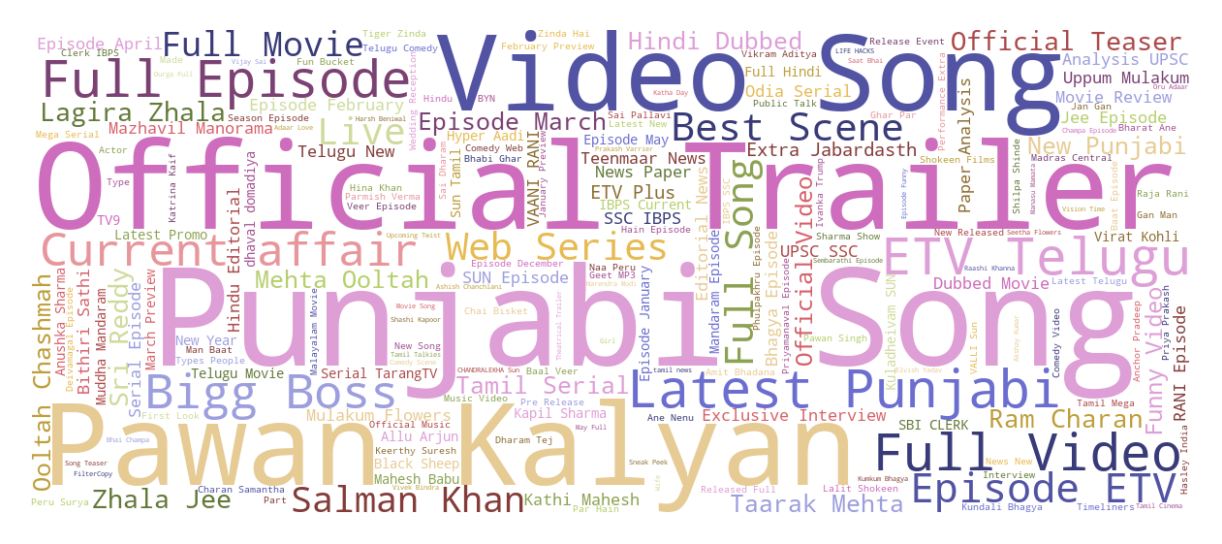

In [47]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=True,include_numbers=False,min_word_length=3, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
cloud2 = plt.axis("off")

C:\Users\Dell\AppData\Local\Temp\ipykernel_1472\3130764750.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x="video_count", y="channel_title", data=df_channel_views,
C:\Users\Dell\AppData\Local\Temp\ipykernel_1472\3130764750.py:5: UserWarning: The palette list has more values (20) than needed (5), which may not be intended.
  bar2 = sns.barplot(x="video_count", y="channel_title", data=df_channel_views,


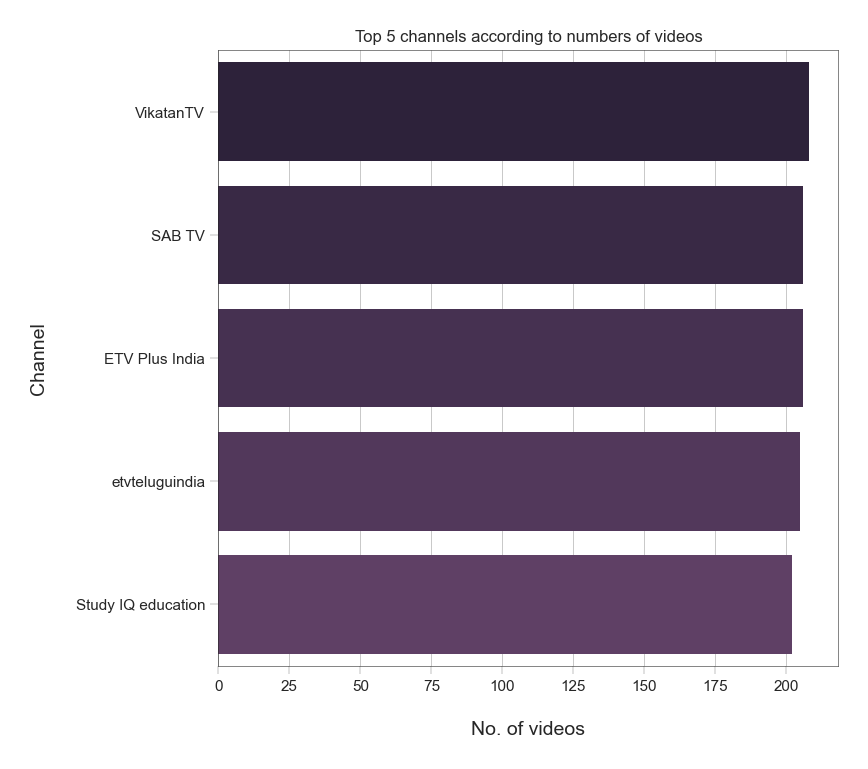

In [59]:
df_channel_views = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(5)

fig, ax = plt.subplots(figsize=(8,8))
bar2 = sns.barplot(x="video_count", y="channel_title", data=df_channel_views,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
bar2 = ax.set(xlabel="No. of videos", ylabel="Channel", title = "Top 5 channels according to numbers of videos")

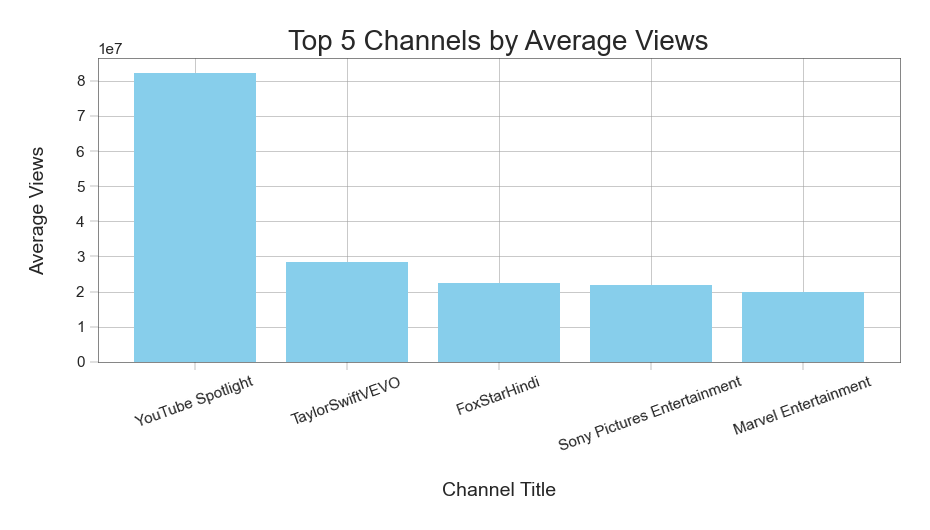

In [54]:
# Group by 'channel_title' and calculate the mean of 'views'
df_channels = df.groupby("channel_title")["views"].mean().sort_values(ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(9, 5))
plt.bar(x=df_channels.index, height=df_channels.values, color='skyblue')
plt.xlabel('Channel Title')
plt.ylabel('Average Views')
plt.title('Top 5 Channels by Average Views', size = 20)
plt.xticks(rotation=20)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

# Display the plot
plt.show()

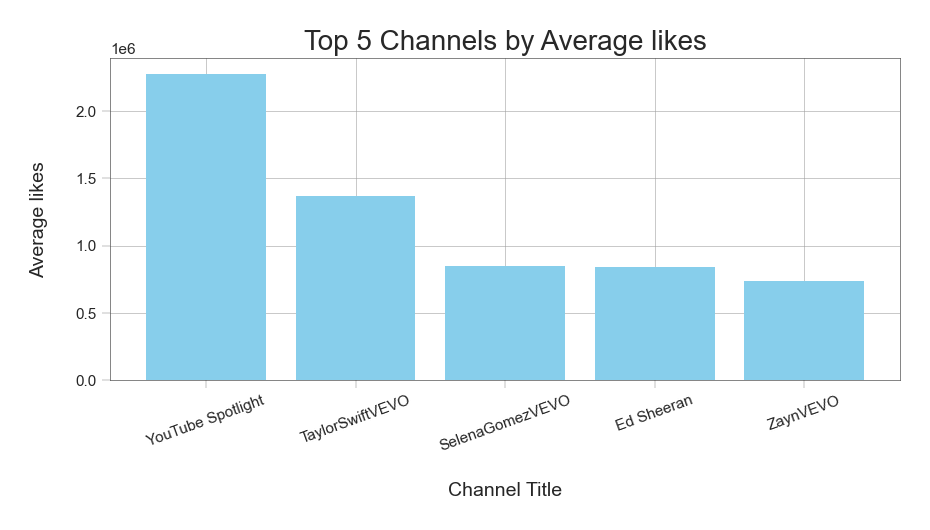

In [56]:
# Group by 'channel_title' and calculate the mean of 'views'
df_channels = df.groupby("channel_title")["likes"].mean().sort_values(ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(9, 5))
plt.bar(x=df_channels.index, height=df_channels.values, color='skyblue')
plt.xlabel('Channel Title')
plt.ylabel('Average likes')
plt.title('Top 5 Channels by Average likes', size = 20)
plt.xticks(rotation=20)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

# Display the plot
plt.show()

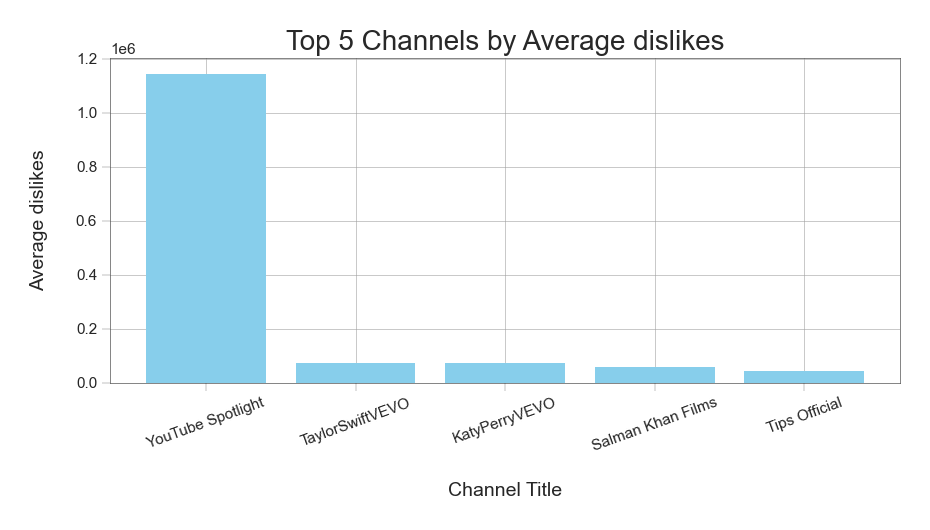

In [58]:
# Group by 'channel_title' and calculate the mean of 'views'
df_channels = df.groupby("channel_title")["dislikes"].mean().sort_values(ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(9, 5))
plt.bar(x=df_channels.index, height=df_channels.values, color='skyblue')
plt.xlabel('Channel Title')
plt.ylabel('Average dislikes')
plt.title('Top 5 Channels by Average dislikes', size = 20)
plt.xticks(rotation=20)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

# Display the plot
plt.show()

## Reference:

### [ https://thecleverprogrammer.com/2020/11/28/youtube-trending-videos-analysis-with-python/]( https://thecleverprogrammer.com/2020/11/28/youtube-trending-videos-analysis-with-python/ 'Link title')
### [https://www.kaggle.com/code/chiragmalhan22/indian-trending-youtube-video-insights/notebook](https://www.kaggle.com/code/chiragmalhan22/indian-trending-youtube-video-insights/notebook)
